<a href="https://colab.research.google.com/github/HenryGC2024/2025_UTEC_PROGRAMACION_101/blob/main/RUTAS%20SEGURAS%20PARA%20CICLITAS%20Y%20DELIVERY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

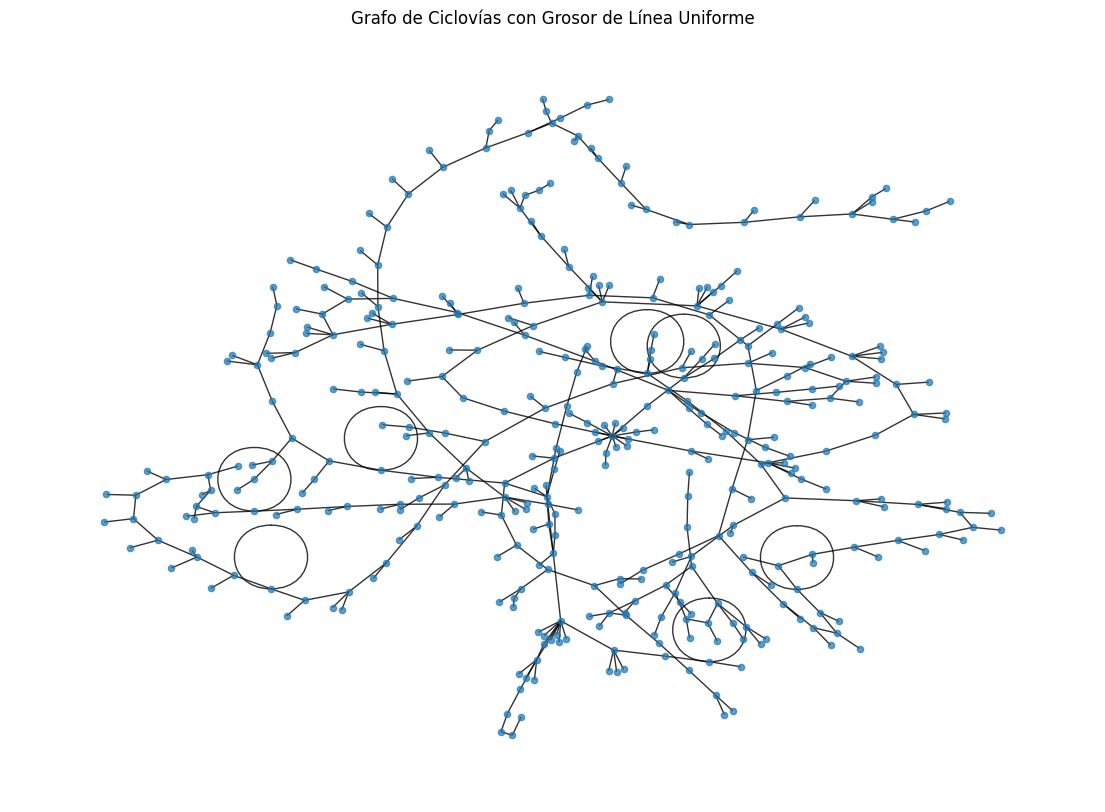

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar CSV de aristas con pesos
edges_df = pd.read_csv('sample_data/ciclovias_aristas_pesos.csv')

# Construir grafo
G = nx.Graph()
for _, row in edges_df.iterrows():
    u = row['origen']
    v = row['destino']
    G.add_edge(u, v)

# Layout de nodos
pos = nx.spring_layout(G, seed=42)

# Dibujar grafo con grosor de línea uniforme
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=20, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8)
plt.title('Grafo de Ciclovías con Grosor de Línea Uniforme')
plt.axis('off')
plt.show()


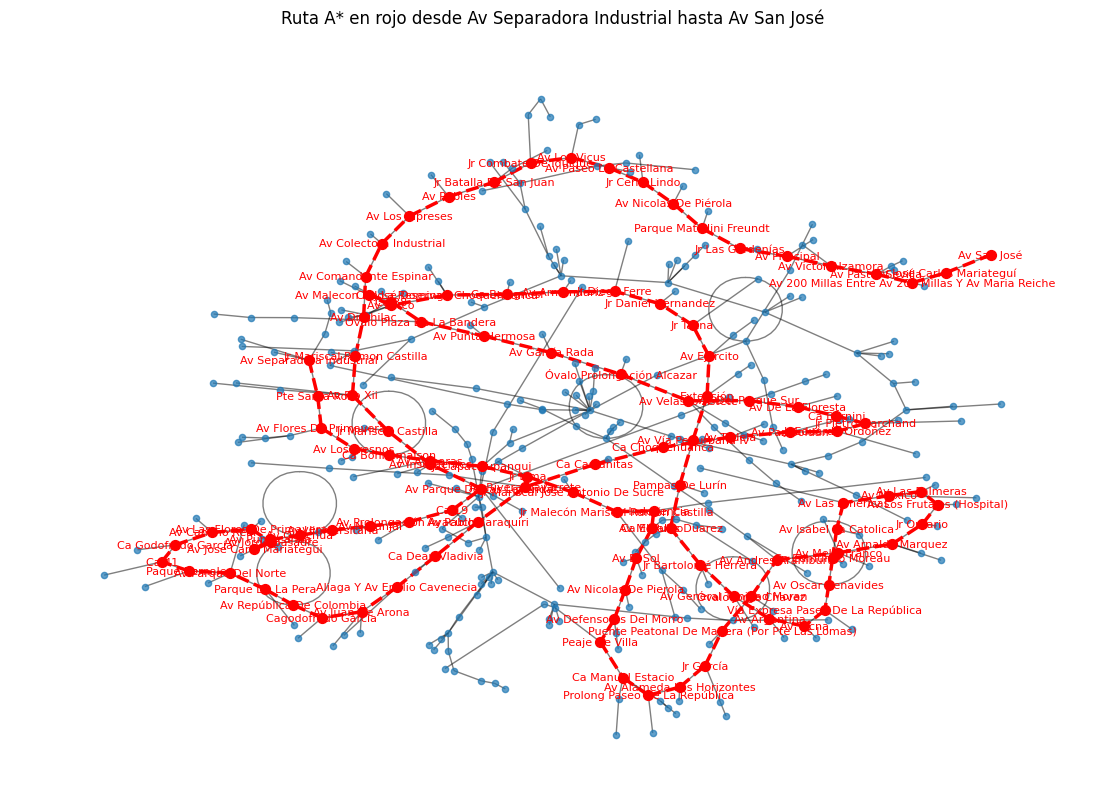

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math

# 1) Cargar CSV de aristas con pesos
edges_df = pd.read_csv('sample_data/ciclovias_aristas_pesos.csv')

# 2) Construir grafo con peso igual a longitud del tramo
G = nx.Graph()
for _, row in edges_df.iterrows():
    u, v = row['origen'], row['destino']
    length = row['longitud_km'] if not pd.isna(row['longitud_km']) else 1.0
    G.add_edge(u, v, weight=length)

# 3) Calcular posiciones con spring_layout
pos = nx.spring_layout(G, seed=42)

# 4) Función heurística Euclidiana basada en el layout
def heuristic(a, b):
    xa, ya = pos[a]
    xb, yb = pos[b]
    return math.hypot(xa - xb, ya - yb)

# 5) Elegir dos nodos (puedes cambiar por los tuyos)
nodes = list(G.nodes())
source, target = nodes[0], nodes[-1]

# 6) Calcular ruta A*
ruta_ast = nx.astar_path(G, source, target, heuristic=heuristic, weight='weight')

# 7) Dibujar grafo base con grosor de línea uniforme
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=20, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# 8) Resaltar ruta A* en color rojo
edges_ast = list(zip(ruta_ast, ruta_ast[1:]))
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges_ast,
    edge_color='red',
    width=2.5,
    style='dashed'
)

# 9) Etiquetar sólo los nodos de la ruta en rojo
nx.draw_networkx_nodes(G, pos, nodelist=ruta_ast, node_color='red', node_size=50)
nx.draw_networkx_labels(
    G, pos,
    labels={n: n for n in ruta_ast},
    font_size=8,
    font_color='red'
)

plt.title(f"Ruta A* en rojo desde {source} hasta {target}")
plt.axis('off')
plt.show()


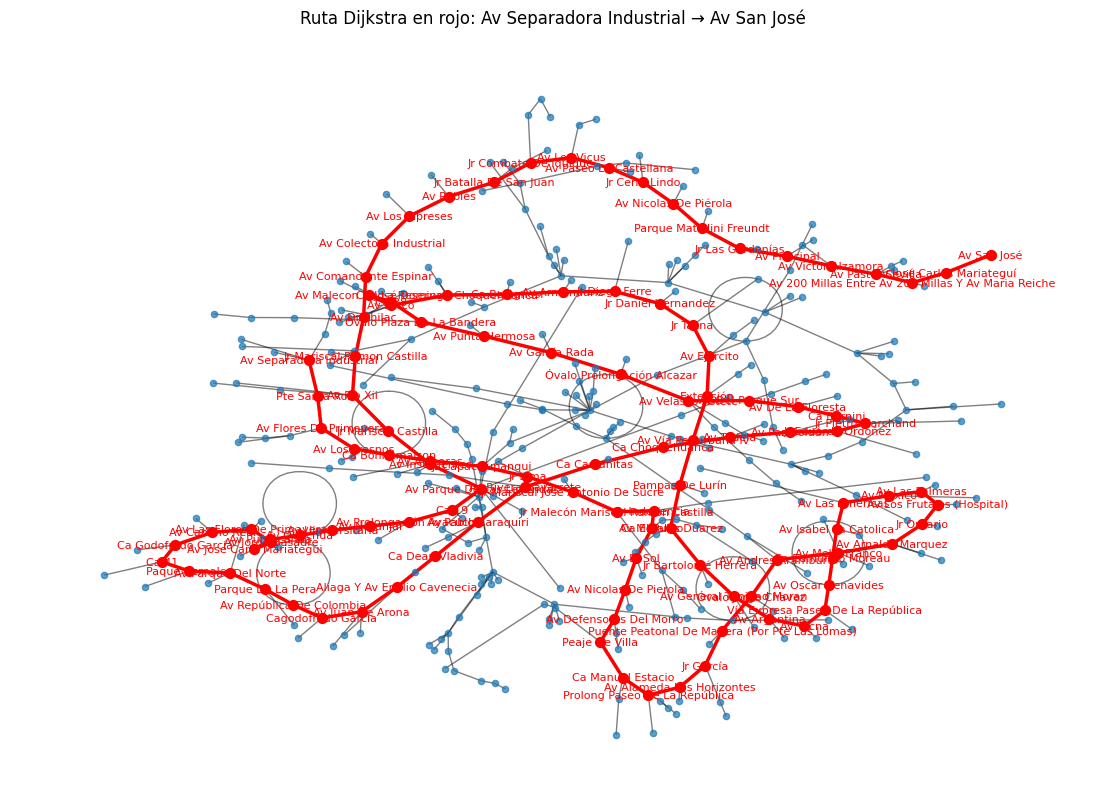

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# 1) Cargar CSV de aristas con pesos
edges_df = pd.read_csv('sample_data/ciclovias_aristas_pesos.csv')

# 2) Construir grafo con peso igual a longitud del tramo (weight=longitud_km)
G = nx.Graph()
for _, row in edges_df.iterrows():
    u, v = row['origen'], row['destino']
    length = row['longitud_km'] if not pd.isna(row['longitud_km']) else 1.0
    G.add_edge(u, v, weight=length)

# 3) Calcular posiciones con spring_layout
pos = nx.spring_layout(G, seed=42)

# 4) Elegir dos nodos (puedes cambiar estos índices)
nodes = list(G.nodes())
random.seed(42)
source, target = nodes[0], nodes[-1]

# 5) Calcular ruta Dijkstra (menor distancia)
ruta_dij = nx.dijkstra_path(G, source, target, weight='weight')

# 6) Dibujar grafo base con grosor de línea uniforme
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=20, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# 7) Resaltar ruta Dijkstra en color rojo sólido
edges_dij = list(zip(ruta_dij, ruta_dij[1:]))
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges_dij,
    edge_color='red',
    width=2.5,
    style='solid'
)

# 8) Etiquetar sólo los nodos de la ruta en rojo
nx.draw_networkx_nodes(G, pos, nodelist=ruta_dij, node_color='red', node_size=50)
nx.draw_networkx_labels(
    G, pos,
    labels={n: n for n in ruta_dij},
    font_size=8,
    font_color='red'
)

plt.title(f"Ruta Dijkstra en rojo: {source} → {target}")
plt.axis('off')
plt.show()
